In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import math

import folium
from folium.plugins import HeatMap

# Importando os datasets

In [132]:
df_bts = pd.read_csv('input_data/02_pre_processed_files/bts.csv')
df_test_alunos = pd.read_csv('input_data/02_pre_processed_files/meds_test_alunos.csv')
df_train_alunos = pd.read_csv('input_data/02_pre_processed_files/meds_train_alunos.csv')

In [133]:
df_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      int64  
 1   grupo       9 non-null      int64  
 2   btsId       9 non-null      object 
 3   btsNetNome  9 non-null      object 
 4   lat         9 non-null      float64
 5   lon         9 non-null      float64
 6   cch         9 non-null      int64  
 7   azimuth     9 non-null      int64  
 8   RssiId      9 non-null      object 
dtypes: float64(2), int64(4), object(3)
memory usage: 780.0+ bytes


In [134]:
df_test_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2904 non-null   int64  
 1   ponto_id    2904 non-null   int64  
 2   rssi_1_1    2904 non-null   float64
 3   rssi_1_2    2904 non-null   float64
 4   rssi_1_3    2904 non-null   float64
 5   rssi_2_1    2904 non-null   float64
 6   rssi_2_2    2904 non-null   float64
 7   rssi_2_3    2904 non-null   float64
 8   rssi_3_1    2904 non-null   float64
 9   rssi_3_2    2904 non-null   float64
 10  rssi_3_3    2904 non-null   float64
 11  delay_1     2904 non-null   float64
 12  delay_2     2904 non-null   float64
 13  delay_3     2904 non-null   float64
 14  lat         2904 non-null   float64
 15  lon         2904 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 363.1 KB


In [135]:
df_train_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6775 non-null   int64  
 1   ponto_id    6775 non-null   int64  
 2   rssi_1_1    6775 non-null   float64
 3   rssi_1_2    6775 non-null   float64
 4   rssi_1_3    6775 non-null   float64
 5   rssi_2_1    6775 non-null   float64
 6   rssi_2_2    6775 non-null   float64
 7   rssi_2_3    6775 non-null   float64
 8   rssi_3_1    6775 non-null   float64
 9   rssi_3_2    6775 non-null   float64
 10  rssi_3_3    6775 non-null   float64
 11  delay_1     6775 non-null   float64
 12  delay_2     6775 non-null   float64
 13  delay_3     6775 non-null   float64
 14  lat         6775 non-null   float64
 15  lon         6775 non-null   float64
 16  indoor      6775 non-null   bool   
dtypes: bool(1), float64(14), int64(2)
memory usage: 853.6 KB


# Tratamento dos dados

In [136]:
df_train_alunos[df_train_alunos.duplicated()]

,Unnamed: 0,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor


In [137]:
df_test_alunos[df_test_alunos.duplicated()]

,Unnamed: 0,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon


In [138]:
df_train_alunos.describe()

,Unnamed: 0,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000
mean,3387.000000,4856.099779,-100.789923,-105.688802,-100.545198,-103.524786,-97.210290,-97.193499,-93.644749,-93.353728,-107.478361,4.679410,3.159262,2.504945,-8.054510,-34.951792
std,1955.918369,2785.645694,10.025728,10.397924,9.968138,13.367328,8.853480,9.992950,7.688089,8.110877,11.003407,0.911469,1.009927,1.095094,0.002388,0.002310
min,0.000000,1.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-113.140000,-115.630000,-115.000000,1.000000,0.000000,0.000000,-8.059550,-34.959850
25%,1693.500000,2434.500000,-107.650000,-115.000000,-107.148571,-115.000000,-102.202857,-101.652857,-99.480000,-99.005000,-115.000000,5.000000,3.000000,2.000000,-8.055784,-34.951728
50%,3387.000000,4875.000000,-103.040000,-110.425000,-99.750000,-108.430000,-97.170000,-95.615714,-94.785000,-95.688000,-115.000000,5.000000,3.000000,2.000000,-8.055494,-34.951597
75%,5080.500000,7272.500000,-93.455000,-97.350000,-93.340000,-96.817917,-92.080000,-91.951429,-89.375000,-89.610500,-97.600000,5.000000,3.000000,3.000000,-8.055310,-34.951331
max,6774.000000,9676.000000,-61.380000,-64.820000,-60.640000,-36.960000,-59.170000,-56.980000,-56.060000,-55.870000,-52.540000,8.000000,7.000000,7.000000,-8.046420,-34.945110


In [139]:
df_test_alunos.describe()

,Unnamed: 0,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,1451.500000,4799.106405,-101.193782,-106.116658,-100.985157,-104.170058,-97.634788,-97.628303,-93.751564,-93.358305,-107.703493,4.699725,3.162534,2.483471,-8.054552,-34.951807
std,838.456916,2814.236124,9.850651,10.158505,9.761652,12.914444,8.654757,9.933887,7.567520,8.045403,10.945147,0.864614,1.005202,1.084003,0.002327,0.002297
min,0.000000,0.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-107.153333,-107.960000,-115.000000,1.000000,0.000000,0.000000,-8.059490,-34.959840
25%,725.750000,2361.000000,-107.650000,-115.000000,-107.148571,-115.000000,-102.805000,-102.874286,-99.480000,-99.034000,-115.000000,5.000000,3.000000,2.000000,-8.055784,-34.951728
50%,1451.500000,4765.500000,-103.705000,-110.425000,-100.215000,-108.430000,-97.200000,-95.780000,-94.973333,-95.755000,-115.000000,5.000000,3.000000,2.000000,-8.055506,-34.951597
75%,2177.250000,7210.250000,-94.474286,-97.485893,-93.890938,-97.560000,-92.550000,-92.514286,-89.860000,-88.874000,-97.600000,5.000000,3.000000,3.000000,-8.055380,-34.951331
max,2903.000000,9678.000000,-67.010000,-65.390000,-65.570000,-45.020000,-61.420000,-59.110000,-60.470000,-59.630000,-52.540000,7.000000,7.000000,7.000000,-8.046430,-34.945110


In [140]:
df_train_indoors = df_train_alunos[df_train_alunos['indoor'] == True]
df_train_indoors

,Unnamed: 0,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,0,6604,-103.705000,-110.425,-107.381667,-110.33,-108.345000,-106.590000,-107.153333,-102.120000,-115.00,5.0,3.0,2.0,-8.055786,-34.951505,True
1,1,5515,-105.225000,-115.000,-105.210000,-115.00,-105.835000,-115.000000,-88.470000,-94.024286,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
2,2,5049,-102.610000,-115.000,-101.380000,-115.00,-104.295000,-97.360000,-96.980000,-99.572500,-115.00,5.0,3.0,2.0,-8.055506,-34.951693,True
4,4,1203,-109.088333,-107.200,-107.010000,-108.43,-104.845714,-101.435714,-103.065000,-102.110000,-115.00,5.0,3.0,2.0,-8.055380,-34.951736,True
7,7,1926,-98.748000,-99.670,-98.610000,-97.86,-92.837500,-90.747143,-100.030000,-95.250000,-115.00,5.0,3.0,3.0,-8.055494,-34.951316,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,6769,6265,-103.705000,-110.425,-107.381667,-110.33,-98.065000,-105.560000,-100.240000,-99.570000,-115.00,5.0,3.0,2.0,-8.055786,-34.951505,True
6770,6770,5734,-105.225000,-115.000,-105.210000,-115.00,-105.835000,-115.000000,-93.005000,-97.114286,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
6771,6771,5191,-105.225000,-115.000,-105.210000,-115.00,-105.835000,-115.000000,-87.315000,-88.735714,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
6772,6772,5390,-105.225000,-115.000,-105.210000,-115.00,-105.835000,-115.000000,-95.165000,-90.705714,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True


In [141]:
df_train_outdoors = df_train_alunos[df_train_alunos['indoor'] == False]
df_train_outdoors

,Unnamed: 0,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
3,3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.5925,-92.460000,-86.813333,-102.688000,-87.2700,4.0,7.0,2.0,-8.05039,-34.95963,False
5,5,6952,-91.530000,-99.115714,-89.424286,-96.235000,-92.8375,-93.327143,-82.363333,-81.940000,-79.3400,6.0,5.0,0.0,-8.05578,-34.95639,False
6,6,8875,-80.246429,-98.010714,-81.366667,-99.550000,-97.2450,-93.067143,-71.000000,-99.934667,-95.8475,3.0,4.0,3.0,-8.04971,-34.95464,False
10,10,6847,-91.322857,-99.284286,-91.764286,-102.910000,-92.8475,-95.252857,-87.356667,-74.904000,-87.3500,6.0,6.0,0.0,-8.05625,-34.95713,False
11,11,7610,-84.631429,-99.635714,-86.477143,-95.720000,-100.2250,-88.232857,-78.955000,-89.444000,-61.0800,6.0,6.0,0.0,-8.05402,-34.95955,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6752,6752,9274,-100.631429,-90.381429,-97.050714,-68.890000,-89.4825,-84.471429,-86.500000,-90.834000,-96.9200,3.0,2.0,6.0,-8.04837,-34.94554,False
6753,6753,8666,-83.708571,-94.275000,-88.080000,-96.340000,-97.5075,-96.057143,-87.583333,-98.048000,-96.7075,3.0,4.0,3.0,-8.05055,-34.95351,False
6762,6762,6949,-88.731429,-99.574286,-83.260000,-94.765000,-99.0650,-78.950000,-87.240000,-85.380000,-70.0800,6.0,6.0,0.0,-8.05579,-34.95879,False
6765,6765,8322,-88.152857,-98.278571,-90.050000,-99.840000,-99.4975,-92.188571,-79.693333,-95.630000,-86.4300,4.0,6.0,1.0,-8.05169,-34.95775,False


# Visualizando pontos e antenas

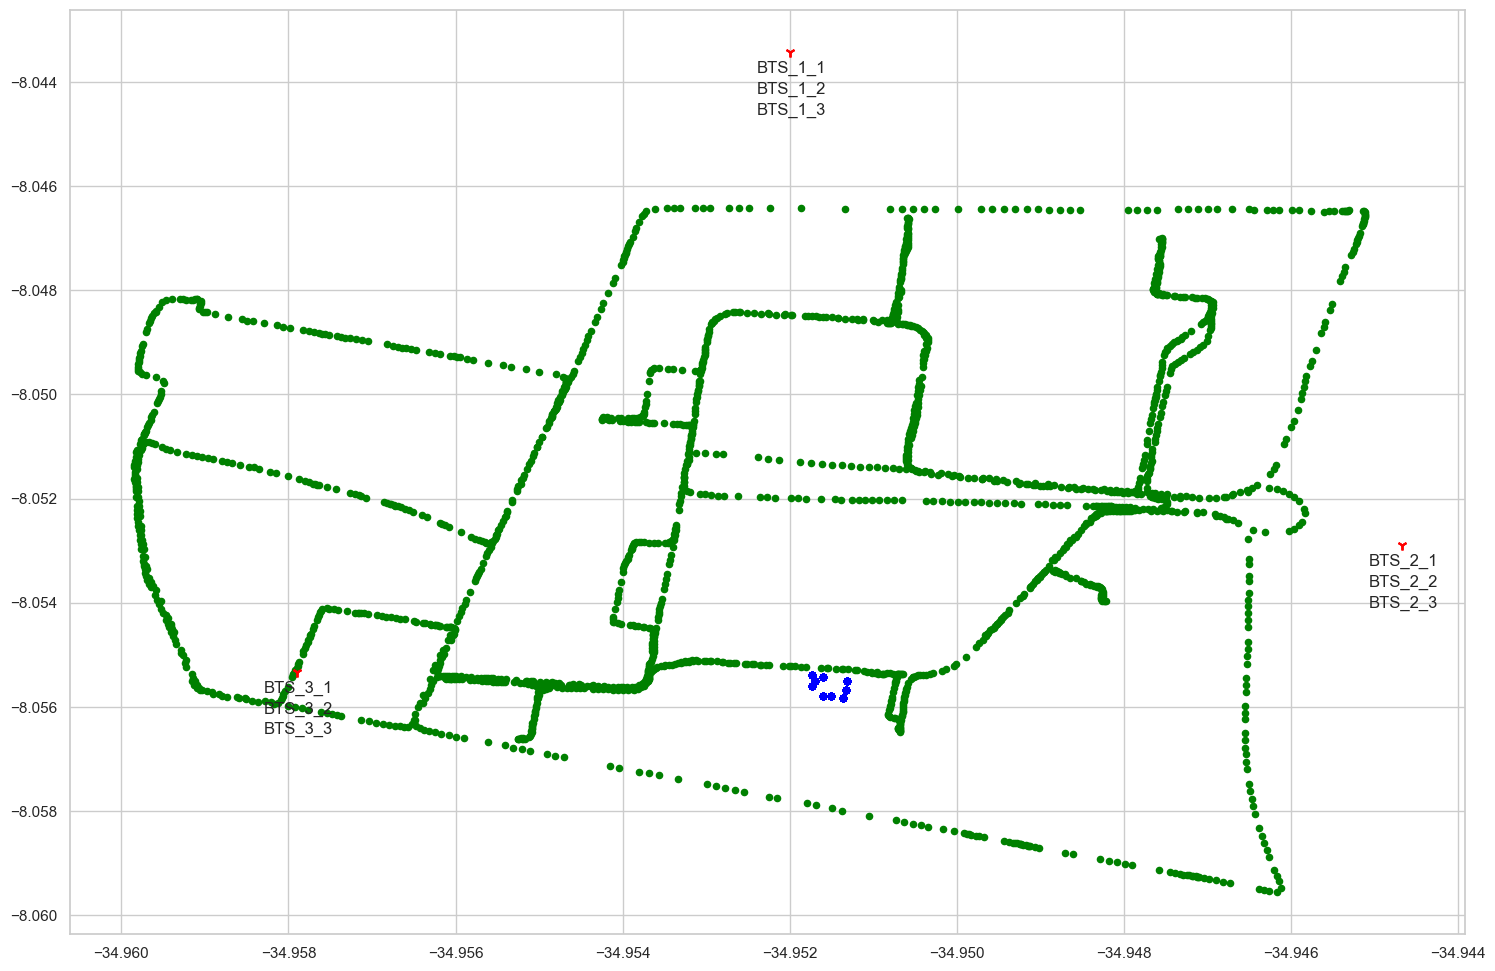

In [142]:
fig, subs = plt.subplots()

subs.scatter(df_train_indoors['lon'], df_train_indoors['lat'], color='blue', s = 20)
subs.scatter(df_train_outdoors['lon'], df_train_outdoors['lat'], color='green', s = 20)
subs.scatter(df_bts['lon'], df_bts['lat'], color = 'red', s = 50, alpha = 1, marker = '1')

aux_bts_dict = {}
for i, row in df_bts.iterrows():
    coordinates = (row['lon'], row['lat'])
    if coordinates not in aux_bts_dict:
        aux_bts_dict[coordinates] = 1
    else:
        aux_bts_dict[coordinates] += 1
    subs.annotate(row['btsId'], coordinates, xytext=(coordinates[0]-0.0004, coordinates[1]-0.0004 * aux_bts_dict[coordinates]))

plt.gcf().set_size_inches((18,12))
plt.show()

In [143]:
norm = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
df_train_alunos['delay_1_norm'] = norm(df_train_alunos['delay_1'])
df_train_alunos['delay_2_norm'] = norm(df_train_alunos['delay_2'])
df_train_alunos['delay_3_norm'] = norm(df_train_alunos['delay_3'])
df_train_alunos['color'] = df_train_alunos.apply(lambda row: (row['delay_1_norm'], row['delay_2_norm'], row['delay_3_norm']), axis=1)

# Visualização com espectro de cores representando os delays com cada grupo de antenas

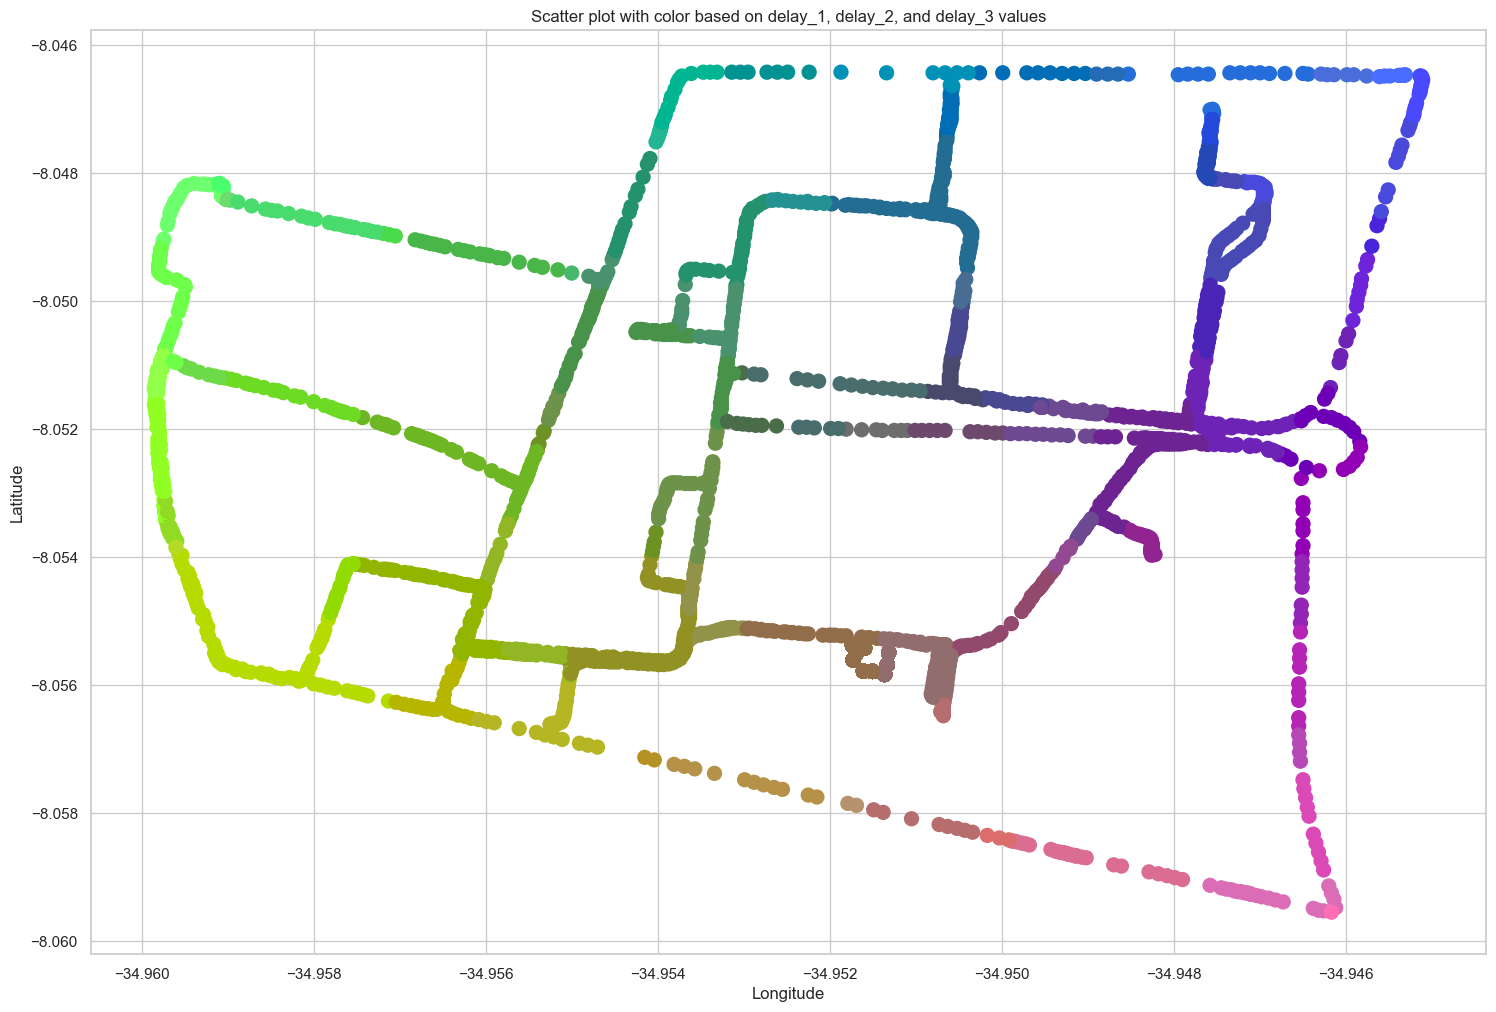

In [144]:
plt.scatter(df_train_alunos['lon'], df_train_alunos['lat'], color=df_train_alunos['color'], s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot with color based on delay_1, delay_2, and delay_3 values')

plt.gcf().set_size_inches((18,12))
plt.show()

In [145]:
df_train_alunos = df_train_alunos.drop(columns=['color'])

In [146]:
map_center = [df_train_alunos['lat'].mean(), df_train_alunos['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=6)

heat_data = [[row['lat'], row['lon']] for index, row in df_train_alunos.iterrows()]

HeatMap(heat_data).add_to(mymap)

mymap.save("output_data/heatmaps/heatmap_train_alunos.html")

In [147]:
map_center = [df_train_indoors['lat'].mean(), df_train_indoors['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=6)

heat_data = [[row['lat'], row['lon']] for index, row in df_train_indoors.iterrows()]

HeatMap(heat_data).add_to(mymap)

mymap.save("output_data/heatmaps/heatmap_train_indoors.html")

In [148]:
map_center = [df_train_outdoors['lat'].mean(), df_train_outdoors['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=6)

heat_data = [[row['lat'], row['lon']] for index, row in df_train_outdoors.iterrows()]

HeatMap(heat_data).add_to(mymap)

mymap.save("output_data/heatmaps/heatmap_train_outdoors.html")

In [149]:
sns.set(style="whitegrid")

# Visualização de distribuição dos dados

In [150]:
def show_outliers_samples_rssi(df):
    columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']

    plt.figure(figsize=(12, 8))
    for col in columns:
        plt.subplot(3, 3, columns.index(col) + 1)
        plt.scatter(df[col], range(len(df)), alpha=0.5)
        plt.title(col)
        plt.xlabel('RSSI')
        plt.ylabel('Amostra')
        plt.xlim(-120, -60)

    plt.tight_layout()
    plt.show()

In [151]:
def show_distrib_rssi(df):
    columns = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3']

    colors = sns.color_palette('husl', len(columns))

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
    for col, ax, color in zip(columns, axes.ravel(), colors):
        sns.histplot(data=df[col], bins=20, kde=False, color=color, ax=ax)
        ax.set_xlabel('RSSI')
        ax.set_ylabel('Frequência')
        ax.set_title(f'Distribuição de {col}')


    plt.tight_layout()
    plt.show()

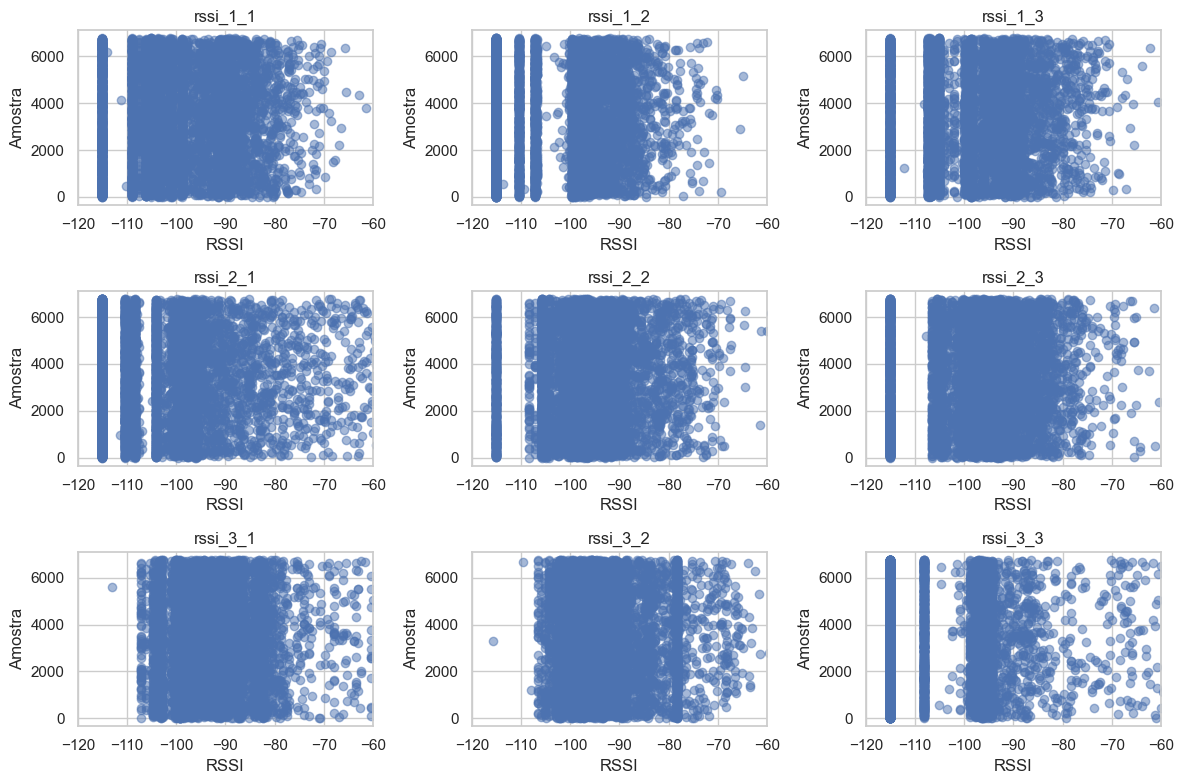

In [152]:
show_outliers_samples_rssi(df_train_alunos)

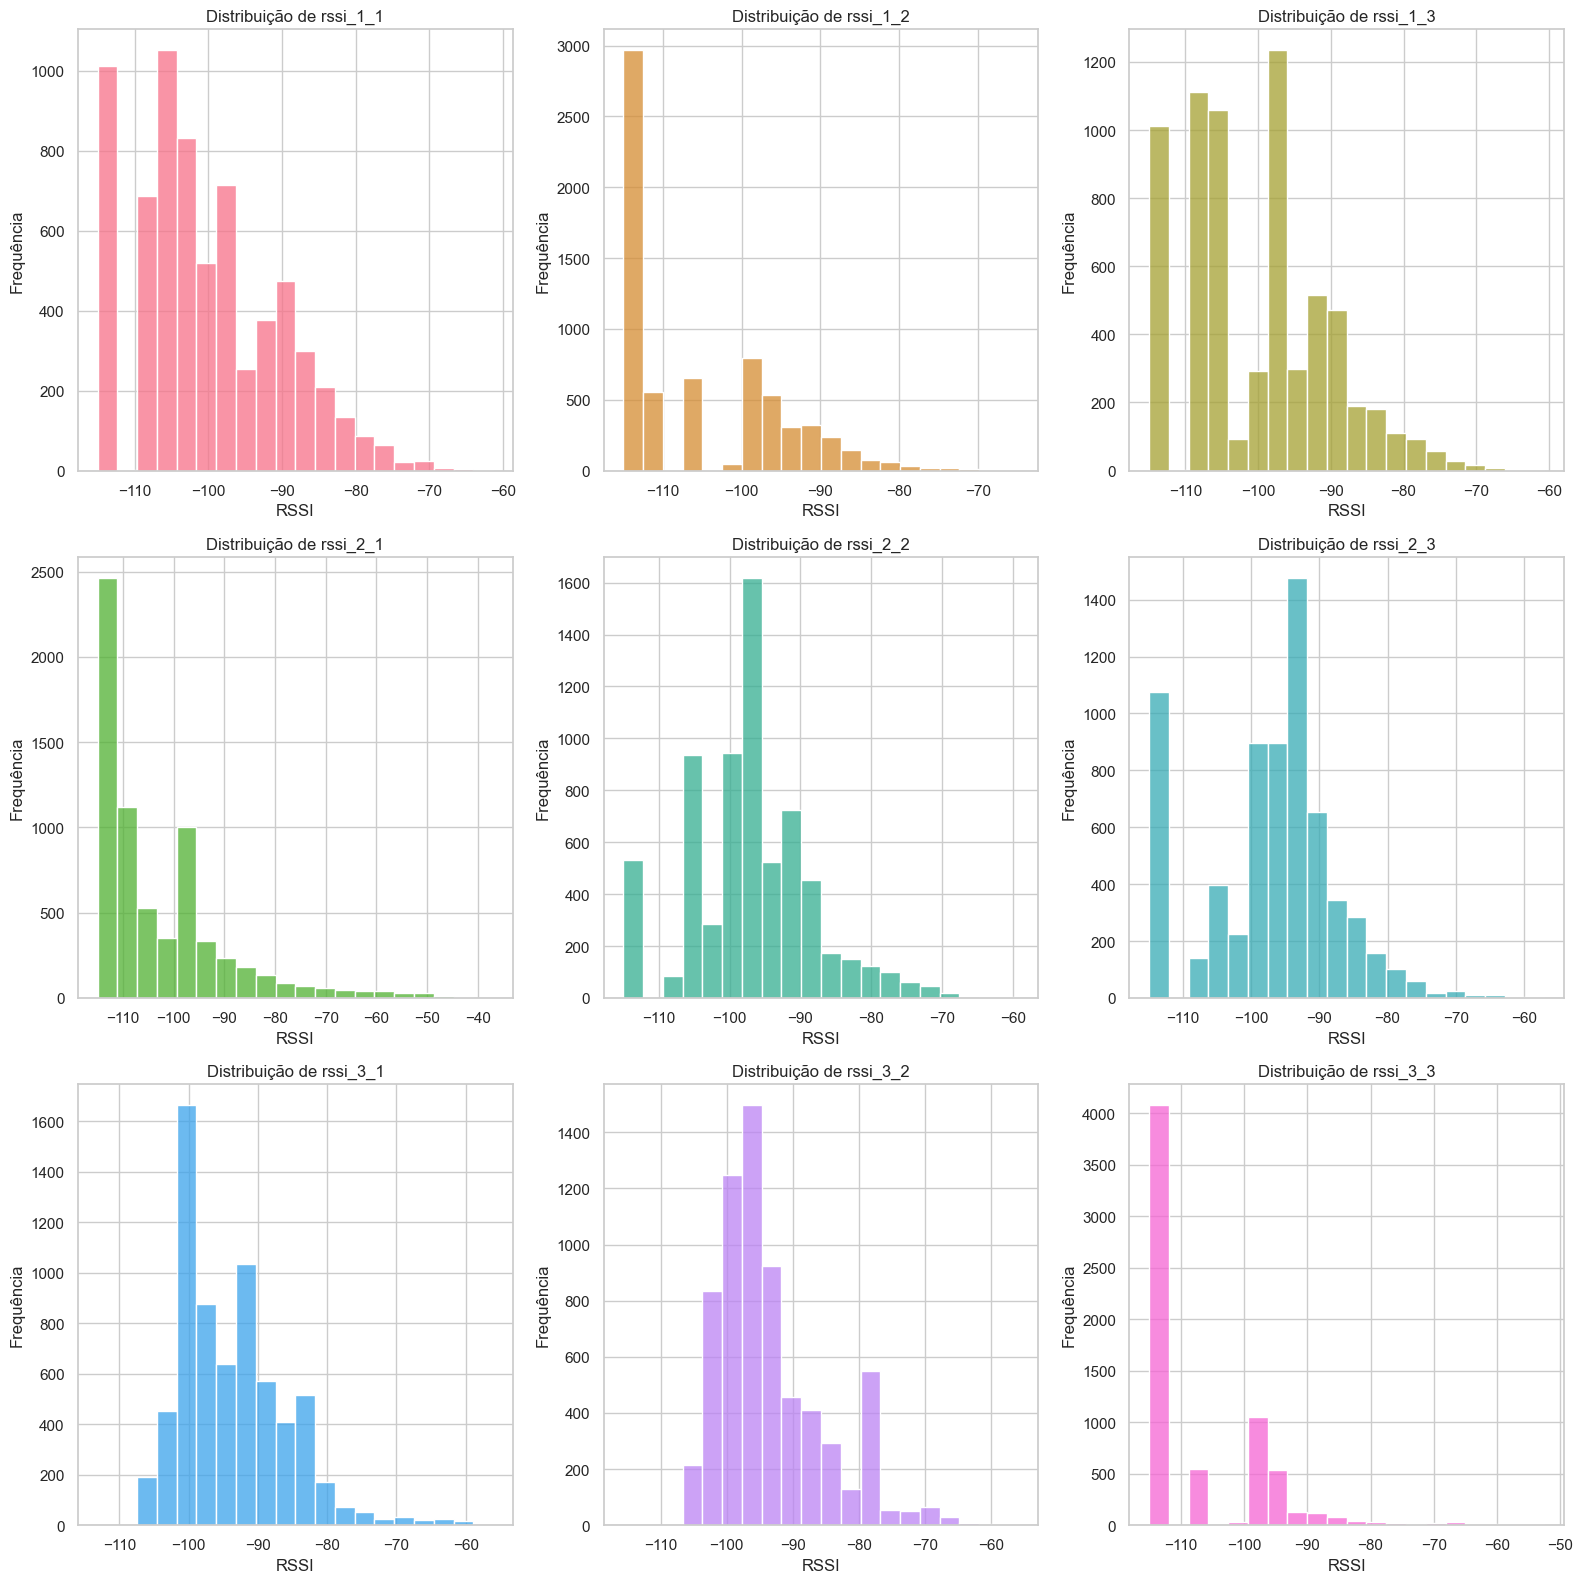

In [153]:
show_distrib_rssi(df_train_alunos)

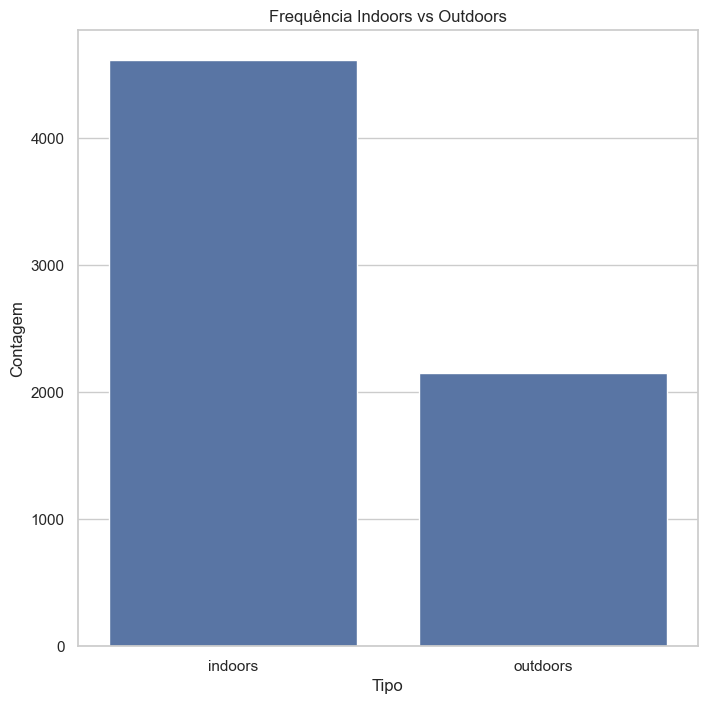

In [154]:
indoor_count = df_train_alunos

plt.figure(figsize=(8, 8))
sns.barplot(x=['indoors', 'outdoors'], y=[len(df_train_indoors), len(df_train_outdoors)])
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.title('Frequência Indoors vs Outdoors')
plt.show()